---

# Ioannou_Georgios


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center">Logistic Regression On The Titanic Dataset</h1>

<h2 align="center"><i style="color:red">Tensorflow</i></h2>

<details>
  <summary>Table of Contents</summary>
  <ol>
    <li>Titanic Dataset</li>
    <li>Libraries</li>
    <li>
      Tensorflow
      <ul>
        <li>Inspect and Explore Data</li>
        <li>Select and Engineer Features</li>
        <li>Build Train Evaluate Model In Tensorflow <i style="color:red">Sequential API</i></li>
      </ul>
    </li>
  </ol>
</details>


---

## **Titanic Dataset**


### The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in April 1912 after hitting an iceberg. This dataset is often used for educational and introductory purposes in data analysis and predictive modeling. Here's a typical description of the Titanic dataset:

- ##### **_Dataset Contents:_** The Titanic dataset contains the following information for each passenger (NOTE:there are null/duplicate values):

  1. **Passenger ID:** A unique identifier for each passenger.
  2. **Survived:** A binary variable indicating whether the passenger survived or not. It is often coded as 1 for survived and 0 for did not survive.
  3. **Pclass:** The passenger's class or ticket class, representing their socio-economic status. It can take values 1 (first class), 2 (second class), or 3 (third class).
  4. **Name:** The passenger's name.
  5. **Sex:** The passenger's gender, either "male" or "female."
  6. **Age:** The passenger's age in years.
  7. **SibSp:** The number of siblings or spouses the passenger had aboard the Titanic.
  8. **Parch:** The number of parents or children the passenger had aboard the Titanic.
  9. **Ticket:** The ticket number.
  10. **Fare:** The fare paid by the passenger.
  11. **Cabin:** The cabin number where the passenger stayed (if available).
  12. **Embarked:** The port of embarkation, which can take values C (Cherbourg), Q (Queenstown), or S (Southampton).

- #### **_Number of Rows:_** **891** Too few number of rows since Neural Networks are data hungy.
- #### **_Number of Columns:_** **12**
- ##### **_Purpose:_** The Titanic dataset is commonly used for predictive modeling and data analysis tasks. Mainly used for binary classification problems such as predicting whether a passenger **survived** or **not** based on the available features. It serves as a beginner-friendly dataset to practice data preprocessing, feature engineering, and building machine learning models.


---

## **Libraries**


In [ ]:
# Import libraries.


import matplotlib.pyplot as plt   # Data visualization.
%matplotlib inline
import numpy as np                # numpy for data handling/wrangling.
import pandas as pd               # pandas for data handling/wrangling.
import plotly.express as px       # Data visualization
import plotly.graph_objects as go # Data visualization
import seaborn as sns             # Data visualization.
sns.set()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Metrics
from sklearn.model_selection import train_test_split # To split data in training/validating/testing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, multilabel_confusion_matrix, precision_score, recall_score


---

<h1 align="center"> Main Code </h1>


## **Tensorflow**


In [ ]:
from tensorflow.keras import models, Input, Sequential   # Group layers into an object with training and inference features.
from tensorflow.keras.layers import Dense                # Keras layers API.
from tensorflow.keras.callbacks import EarlyStopping     # Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau # Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.optimizers import Adam             # Adam optimizer.
from tensorflow.keras.utils import plot_model            # Visualize the model.

### **_Inspect and Explore Data_**


In [ ]:
# Load data
df = pd.read_csv("./titanic.csv")

# Display data
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 1. Shape and size.

print(df.shape)

(891, 12)


In [ ]:
# 2. Describe.

df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 3. Get info on columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Inspect / check for nulls.

df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [ ]:
# Percentage of null values per columns.

((df.isnull().sum() / len(df)) * 100).round(2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
dtype: float64

In [ ]:
# Check for duplicates.

n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


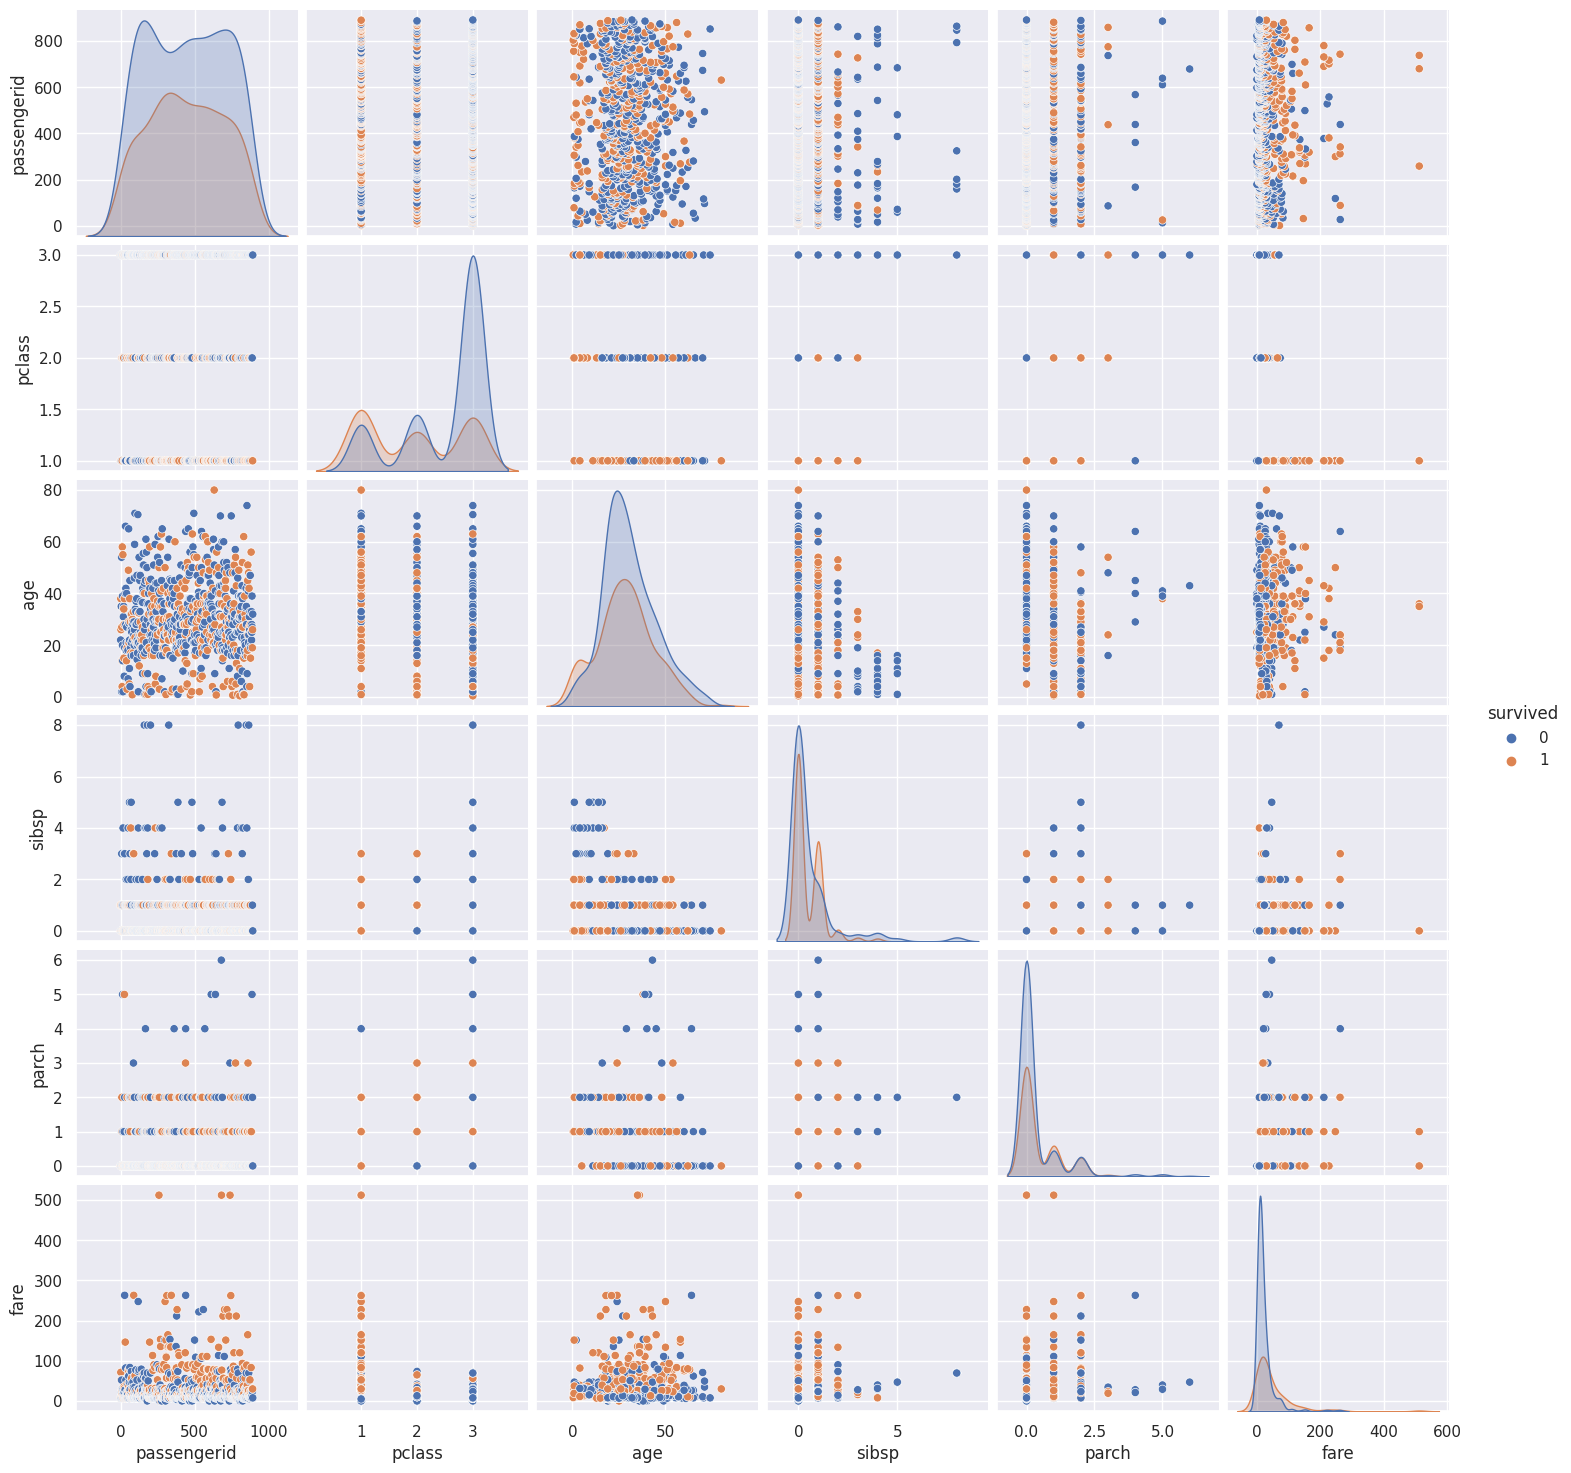

In [ ]:
sns.pairplot(df, hue="survived")

<ipython-input-11-2e2f51a52fed>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="age", hue="survived", shade=True)


<Axes: xlabel='age', ylabel='Density'>

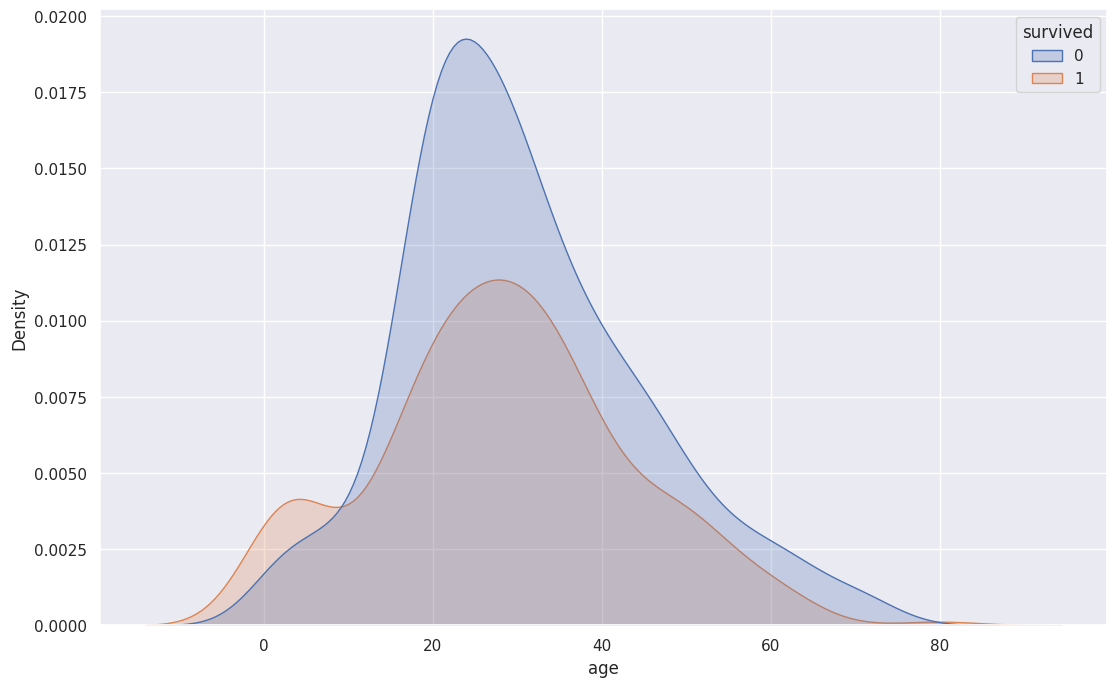

In [ ]:
plt.figure(figsize=(13, 8))
sns.kdeplot(data=df, x="age", hue="survived", shade=True)

In [ ]:
df.groupby("sex")["survived"].sum() / df.groupby("sex")["survived"].count()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

### **_Select and Engineer Features_**


In [ ]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=["sex", "pclass"], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [ ]:
df.iloc[888] # Look at row 888 age.

passengerid                                         889
survived                                              0
name           Johnston, Miss. Catherine Helen "Carrie"
age                                                 NaN
sibsp                                                 1
parch                                                 2
ticket                                       W./C. 6607
fare                                              23.45
cabin                                               NaN
embarked                                              S
sex_male                                              0
pclass_2                                              0
pclass_3                                              1
Name: 888, dtype: object

In [ ]:
# selected_features = ["fare", "pclass_2", "pclass_3", "sex_male"]


# TO INCLUDE AGE: DO EITHER 1. OR 2.
#
# 1. = Drop NA values for age.
# df.dropna(subset=['age'], inplace=True)
# selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]
#
# 2. = Fill NA values for age with the mead or median.
mean_age = df["age"].mean()  # OR median_age = df['age'].median()
df["age"].fillna(
    mean_age, inplace=True
)  # OR df['age'].fillna(median_age, inplace=True)
selected_features = ["age", "fare", "pclass_2", "pclass_3", "sex_male"]

In [ ]:
df.iloc[888] # Look at row 888 age.

passengerid                                         889
survived                                              0
name           Johnston, Miss. Catherine Helen "Carrie"
age                                           29.699118
sibsp                                                 1
parch                                                 2
ticket                                       W./C. 6607
fare                                              23.45
cabin                                               NaN
embarked                                              S
sex_male                                              0
pclass_2                                              0
pclass_3                                              1
Name: 888, dtype: object

In [ ]:
X = df[selected_features]

y = df["survived"]

In [ ]:
# Split the data into:
# 1. Training   (80%)
# 2. Validation (10%)
# 3. Testing    (10%)

X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.2, stratify=y)


X_test, X_valid, y_test, y_valid = train_test_split(X_remain, y_remain, test_size=0.5)


print(
    "Lenght of our Training data:",
    X_train.shape,
    "\nLength of our Validation data:",
    X_valid.shape,
    "\nLength of our Testing data:",
    X_test.shape,
)

Lenght of our Training data: (712, 5) 
Length of our Validation data: (90, 5) 
Length of our Testing data: (89, 5)


In [ ]:
# Convert into a DataFrame with the column name "Survived".

y_train = y_train.to_frame(name="Survived")
y_valid = y_valid.to_frame(name="Survived")
y_test = y_test.to_frame(name="Survived")

In [ ]:
# Convert pandas DataFrames to NumPy arrays to be compatible with the model.

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

X_valid = np.array(X_valid, dtype=np.float32)
y_valid = np.array(y_valid, dtype=np.float32)

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

### **_Build Train Evaluate Model In Tensorflow Sequential API_**


In [ ]:
early_stopping = EarlyStopping(monitor = "val_accuracy",
                               patience = 100, # increase patience to number of epochs and since how the graphs change to demonstrate overfitting.
                               mode = "auto",
                               restore_best_weights = True)

In [ ]:
reduce_learning_rate = ReduceLROnPlateau(monitor ="val_accuracy",
                                         factor = 0.5,
                                         verbose = 1,
                                         min_lr = 0.00001)

In [ ]:
X_train.shape[1] # 5 features selected.

5

In [ ]:
# Define the LogisticRegressionTensorFlow model using the Tensorflow Sequential API.

# Define the model architecture.

model = models.Sequential()
model.add(Input((X_train.shape[1],))) # Input layer.
model.add(Dense(2 * X_train.shape[1], activation="relu")) # Hidden layer. Increase input features by 2. 5*2=10
model.add(Dense(4 * X_train.shape[1], activation="relu")) # Hidden layer. Increase previous features by 4. 5*2=10*4=40
model.add(Dense(1, activation="sigmoid")) # Output layer.

# Define the optimizer.

adam_optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer, loss function, and the metric in interest.

model.compile(optimizer = adam_optimizer, loss = "binary_crossentropy", metrics=["accuracy"])

# Print model summary.

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


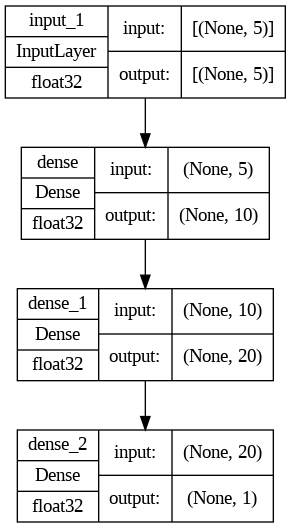

In [ ]:
plot_model(model, show_shapes = True, show_dtype = True)

In [ ]:
history_callback_object = model.fit(x=X_train,
                                    y=y_train,
                                    batch_size=None,
                                    epochs = 5000,
                                    verbose=2,
                                    callbacks=[early_stopping, reduce_learning_rate],
                                    validation_data=(X_valid, y_valid))

Epoch 1/5000
23/23 - 3s - loss: 5.9113 - accuracy: 0.3834 - val_loss: 3.4652 - val_accuracy: 0.3889 - lr: 0.0010 - 3s/epoch - 130ms/step
Epoch 2/5000
23/23 - 0s - loss: 2.4478 - accuracy: 0.3652 - val_loss: 1.2651 - val_accuracy: 0.3667 - lr: 0.0010 - 115ms/epoch - 5ms/step
Epoch 3/5000
23/23 - 0s - loss: 1.1475 - accuracy: 0.3427 - val_loss: 0.7847 - val_accuracy: 0.4444 - lr: 0.0010 - 113ms/epoch - 5ms/step
Epoch 4/5000
23/23 - 0s - loss: 0.6948 - accuracy: 0.5604 - val_loss: 0.6389 - val_accuracy: 0.6222 - lr: 0.0010 - 115ms/epoch - 5ms/step
Epoch 5/5000
23/23 - 0s - loss: 0.6012 - accuracy: 0.6812 - val_loss: 0.6324 - val_accuracy: 0.6333 - lr: 0.0010 - 103ms/epoch - 4ms/step
Epoch 6/5000
23/23 - 0s - loss: 0.5935 - accuracy: 0.7008 - val_loss: 0.6301 - val_accuracy: 0.6444 - lr: 0.0010 - 104ms/epoch - 5ms/step
Epoch 7/5000
23/23 - 0s - loss: 0.5894 - accuracy: 0.6966 - val_loss: 0.6212 - val_accuracy: 0.6444 - lr: 0.0010 - 103ms/epoch - 4ms/step
Epoch 8/5000
23/23 - 0s - loss: 0.5

In [ ]:
fig = px.line(data_frame = history_callback_object.history,
              y = ["loss", "val_loss"],
              labels = {"index":"Epoch", "value":"Loss"},
              title = "Loss vs Epoch")
fig.show()

history_callback_object.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
fig = px.line(data_frame = history_callback_object.history,
              y = ["accuracy", "val_accuracy"],
              labels = {"index":"Epoch", "value":"Accuracy"},
              title = "Accuracy vs Epoch")
fig.show()

history_callback_object.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
# Put the model in evaluation state.

model.evaluate(X_test, y_test)


# Make predictions.

y_pred = (model.predict(X_test) >= 0.5).astype(int)

3/3 [==============================] - 0s 3ms/step


In [ ]:
# Calculate evaluation metrics.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy Score On The Test Set: {accuracy:.2%}")
print(f"Precision Score On The Test Set: {precision:.2%}")
print(f"Recall Score On The Test Set: {recall:.2%}")
print(f"F1 Score On The Test Set: {f1:.2%}")

Accuracy Score On The Test Set: 79.78%
Precision Score On The Test Set: 80.77%
Recall Score On The Test Set: 61.76%
F1 Score On The Test Set: 70.00%


Text(66.25, 0.5, 'Actual')

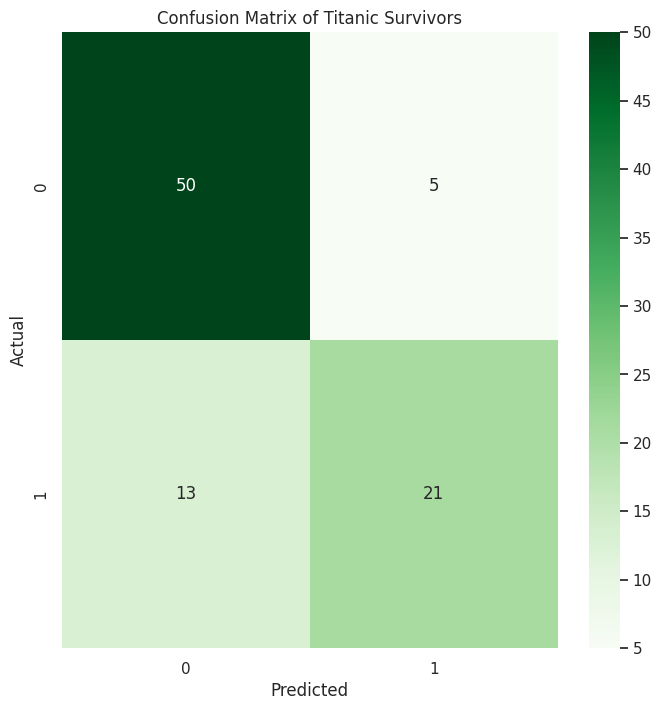

In [ ]:
# Calculate and display the confusion matrix.

cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

tn, fp, fn, tp = cm.ravel()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g")

plt.title("Confusion Matrix of Titanic Survivors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
survive_classes = ["Not Survived", "Survived"]

In [ ]:
print(
    "Model Classification Report\n",
    classification_report(y_test, y_pred, target_names=survive_classes),
)

Model Classification Report
               precision    recall  f1-score   support

Not Survived       0.79      0.91      0.85        55
    Survived       0.81      0.62      0.70        34

    accuracy                           0.80        89
   macro avg       0.80      0.76      0.77        89
weighted avg       0.80      0.80      0.79        89



<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="Build, Train, and Evaluate a Model in Pytorch"/>
